In [1]:
import sys, os
project_root = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
if project_root not in sys.path:
    sys.path.insert(0, project_root)

from extractors import von_neumann, elias, universal_hash
from utils import compute_bias


import numpy as np
import matplotlib.pyplot as plt


In [5]:
import os
os.getcwd()


'c:\\Users\\ereci\\OneDrive\\Desktop\\QRANDOPT\\QRANDOPT\\notebooks'

In [ ]:
import pytest


exit_code = pytest.main([
    "--maxfail=1",
    "--disable-warnings",
    "-q",
])
print(f"pytest exited with code {exit_code}")



no tests ran in 0.00s
pytest exited with code 5


In [3]:

raw_bits = np.random.choice([0,1], size=1000, p=[0.8,0.2]).tolist()
print(f"Raw bias = {compute_bias(raw_bits):.3f}, length = {len(raw_bits)}")


Raw bias = 0.317, length = 1000


In [3]:

import sys, os
from pathlib import Path


p = Path().resolve()


while not (p / "extractors").is_dir():
    if p.parent == p:
        raise RuntimeError("Could not find project root (no 'extractors/' folder).")
    p = p.parent

project_root = p  


os.chdir(project_root)


if str(project_root) not in sys.path:
    sys.path.insert(0, str(project_root))

print(f"✔️ Project root: {project_root}")
print(f"✔️ Working dir:   {os.getcwd()}")


✔️ Project root: C:\Users\ereci\OneDrive\Desktop\QRANDOPT\QRANDOPT
✔️ Working dir:   C:\Users\ereci\OneDrive\Desktop\QRANDOPT\QRANDOPT


In [4]:

import importlib, subprocess, sys

if importlib.util.find_spec("pytest") is None:
    print("Installing pytest…")
    subprocess.check_call([sys.executable, "-m", "pip", "install", "pytest"])
else:
    print("pytest already installed")


pytest already installed


Extractor     | Bias before | Bias after | Output len
------------- | ----------- | ---------- | ----------
         VN |       0.318 |      0.014 |        140
      Elias |       0.318 |      0.125 |        168
       Hash |       0.318 |      0.039 |        256
Maurer–Wolf |       0.318 |      0.004 |        496


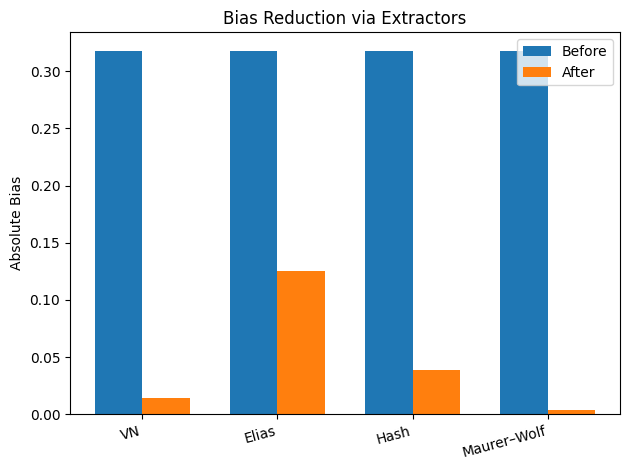

In [ ]:
"""
compare_extractors.py
Bias comparison and plotting for classical extractors plus Maurer–Wolf.
"""
import pytest
import numpy as np
import matplotlib.pyplot as plt

from extractors.von_neumann    import von_neumann
from extractors.elias          import elias
from extractors.universal_hash import universal_hash
from extractors.maurer_wolf    import maurer_wolf_extractor
from utils                     import compute_bias

def bits_to_bytes(bits):
    """Pack list of 0/1 bits into a bytes object (MSB-first)."""
   
    pad = (-len(bits)) % 8
    bits = bits + [0]*pad
    output = bytearray()
    for i in range(0, len(bits), 8):
        byte = 0
        for b in bits[i:i+8]:
            byte = (byte << 1) | b
        output.append(byte)
    return bytes(output)

def bytes_to_bits(b):
    """Unpack bytes into list of bits (MSB-first)."""
    bits = []
    for byte in b:
        for shift in range(7, -1, -1):
            bits.append((byte >> shift) & 1)
    return bits


raw_bits = np.random.choice([0, 1], size=1000, p=[0.8, 0.2]).tolist()

# Applying extractors & computing bias
results = {}
for name, fn in [
    ("VN",          von_neumann),
    ("Elias",       elias),
    ("Hash",        lambda bits: universal_hash(bits, seed="abc")),
    ("Maurer–Wolf", None)  
]:
    if name != "Maurer–Wolf":
        out = fn(raw_bits)
    else:
        # preparing inputs for the byte-based extractor
        raw_bytes = bits_to_bytes(raw_bits)
        seed      = b"abc"              
        out_len   = len(raw_bytes) // 2 
        extracted = maurer_wolf_extractor(raw_bytes, seed, out_len)
        out = bytes_to_bits(extracted)

    results[name] = (compute_bias(raw_bits), compute_bias(out), len(out))

# Print summary table
print("Extractor     | Bias before | Bias after | Output len")
print("------------- | ----------- | ---------- | ----------")
for name, (b0, b1, L) in results.items():
    print(f"{name:>11} | {b0:>11.3f} | {b1:>10.3f} | {L:>10}")

# Plot bias reduction
labels = list(results.keys())
before = [v[0] for v in results.values()]
after  = [v[1] for v in results.values()]
x = np.arange(len(labels))
w = 0.35

fig, ax = plt.subplots()
ax.bar(x - w/2, before, width=w, label="Before")
ax.bar(x + w/2, after,  width=w, label="After")
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=15, ha="right")
ax.set_ylabel("Absolute Bias")
ax.set_title("Bias Reduction via Extractors")
ax.legend()
plt.tight_layout()
plt.show()




In [ ]:

import pytest

# Explicitly pointing pytest at the tests directory:
exit_code = pytest.main([
    f"{project_root}/tests",
    "--maxfail=1",
    "--disable-warnings",
    "-q",
])
print(f"pytest exited with code {exit_code}")


......                                                                   [100%]
6 passed in 0.03s
pytest exited with code 0


In [10]:
import numpy as np



for N in [1000, 5000, 20000]:
    raw = np.random.choice([0,1], N, p=[0.8,0.2]).tolist()
    out = elias(raw)
    print(f"N={N:<5d} | before={compute_bias(raw):.3f} | after={compute_bias(out):.3f} | len={len(out)}")


N=1000  | before=0.285 | after=0.313 | len=801
N=5000  | before=0.302 | after=0.318 | len=4104
N=20000 | before=0.304 | after=0.317 | len=16905
